In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("heart_disease_health_indicators.csv")

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df["HeartDiseaseorAttack"].value_counts()

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

In [5]:
from sklearn.utils import resample

In [6]:
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype("int")

In [7]:
df["HeartDiseaseorAttack"]

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    0
253677    0
253678    0
253679    1
Name: HeartDiseaseorAttack, Length: 253680, dtype: int32

In [8]:
zero_df= df[df["HeartDiseaseorAttack"]==0]
one_df= df[df["HeartDiseaseorAttack"]==1]

In [9]:
len(zero_df)

229787

In [10]:
len(one_df)

23893

In [11]:
new_zero_df = resample(zero_df, n_samples=len(one_df), replace=False)

In [12]:
len(new_zero_df)

23893

In [13]:
new_df = pd.concat([one_df, new_zero_df], axis=0)

In [14]:
new_df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,...,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000
mean,0.500000,0.575315,0.549638,0.973549,28.850898,0.521868,0.096535,0.471351,0.708053,0.620119,...,0.955970,0.095970,2.897250,3.876449,6.461181,0.279789,0.499184,8.981459,4.914222,5.647156
std,0.500005,0.494300,0.497535,0.160475,6.653562,0.499527,0.295326,0.835581,0.454663,0.485362,...,0.205163,0.294553,1.155463,8.323865,10.553632,0.448900,0.500005,2.904253,1.029678,2.174725
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,28.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,7.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47786 entries, 8 to 196971
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  47786 non-null  int32  
 1   HighBP                47786 non-null  float64
 2   HighChol              47786 non-null  float64
 3   CholCheck             47786 non-null  float64
 4   BMI                   47786 non-null  float64
 5   Smoker                47786 non-null  float64
 6   Stroke                47786 non-null  float64
 7   Diabetes              47786 non-null  float64
 8   PhysActivity          47786 non-null  float64
 9   Fruits                47786 non-null  float64
 10  Veggies               47786 non-null  float64
 11  HvyAlcoholConsump     47786 non-null  float64
 12  AnyHealthcare         47786 non-null  float64
 13  NoDocbcCost           47786 non-null  float64
 14  GenHlth               47786 non-null  float64
 15  MentHlth              4

In [16]:
X = new_df.drop("HeartDiseaseorAttack", axis=1)

In [17]:
km = KMeans(n_clusters=2)

In [18]:
y = new_df["HeartDiseaseorAttack"]

In [19]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=43)

In [20]:
km.fit(X_tr)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [21]:
y_pred = km.predict(X_te)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
accuracy_score(y_te, y_pred)

0.591780363271114

In [24]:
cols = new_df.columns.tolist()

In [25]:
new_df.loc[:,cols[:7]].describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke
count,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000
mean,0.500000,0.575315,0.549638,0.973549,28.850898,0.521868,0.096535
std,0.500005,0.494300,0.497535,0.160475,6.653562,0.499527,0.295326
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000
50%,0.500000,1.000000,1.000000,1.000000,28.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000


In [26]:
new_df.loc[:,cols[7:14]].describe()

,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost
count,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000
mean,0.471351,0.708053,0.620119,0.789625,0.046729,0.955970,0.095970
std,0.835581,0.454663,0.485362,0.407580,0.211060,0.205163,0.294553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
new_df.loc[:,cols[14:]].describe()

,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000,47786.000000
mean,2.897250,3.876449,6.461181,0.279789,0.499184,8.981459,4.914222,5.647156
std,1.155463,8.323865,10.553632,0.448900,0.500005,2.904253,1.029678,2.174725
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,4.000000,2.000000,7.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<Axes: >

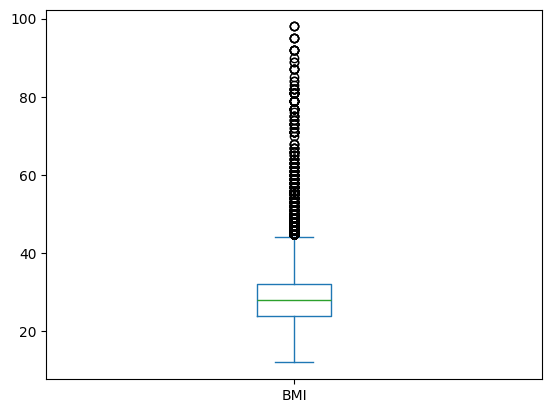

In [28]:
new_df["BMI"].plot.box()

In [29]:
new_df["BMI"].quantile(0.97)

43.0

<Axes: >

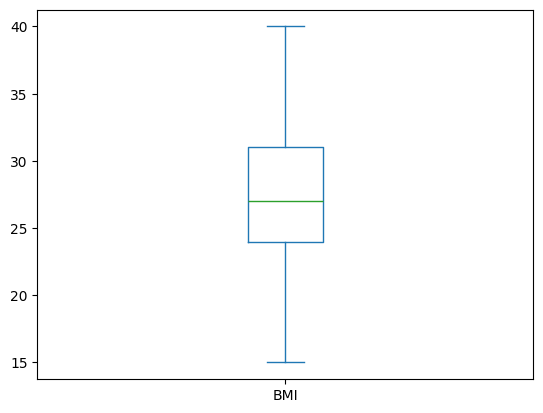

In [30]:
new_df[(new_df["BMI"]>=15)&(new_df["BMI"]<=40)]["BMI"].plot.box()

In [31]:
new_df = new_df[(new_df["BMI"]>=15)&(new_df["BMI"]<=40)]

In [32]:
new_df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,1,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
20,1,1.0,1.0,1.0,22.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,30.0,0.0,1.0,0.0,12.0,4.0,4.0
26,1,1.0,1.0,1.0,37.0,1.0,1.0,2.0,0.0,0.0,...,1.0,0.0,5.0,0.0,0.0,1.0,1.0,10.0,6.0,5.0
27,1,1.0,1.0,1.0,28.0,1.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0,2.0,4.0
47,1,1.0,1.0,1.0,25.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,1.0,0.0,0.0,1.0,10.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111465,0,0.0,0.0,1.0,35.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,4.0,5.0
185635,0,0.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0
70882,0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
68150,0,0.0,0.0,1.0,36.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,4.0,10.0,30.0,0.0,0.0,13.0,5.0,5.0


<Axes: ylabel='Frequency'>

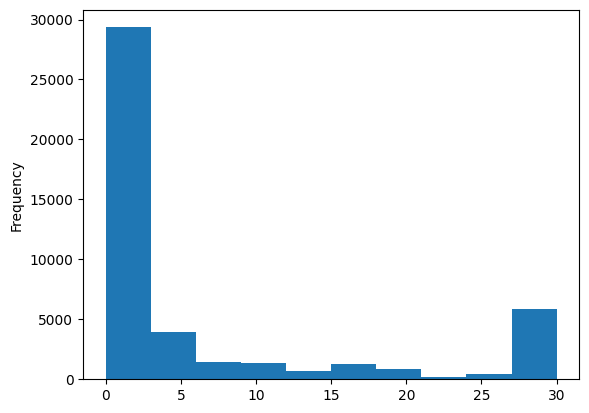

In [33]:
new_df["PhysHlth"].plot.hist()

<Axes: ylabel='Frequency'>

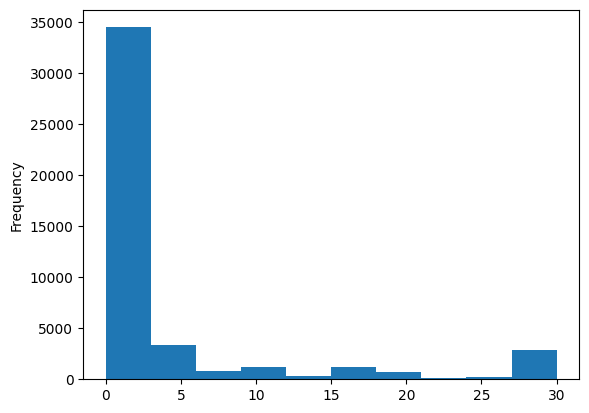

In [34]:
new_df["MentHlth"].plot.hist()

In [35]:
new_df.drop(["MentHlth", "PhysHlth"], axis=1, inplace=True)

In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45339 entries, 8 to 196971
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  45339 non-null  int32  
 1   HighBP                45339 non-null  float64
 2   HighChol              45339 non-null  float64
 3   CholCheck             45339 non-null  float64
 4   BMI                   45339 non-null  float64
 5   Smoker                45339 non-null  float64
 6   Stroke                45339 non-null  float64
 7   Diabetes              45339 non-null  float64
 8   PhysActivity          45339 non-null  float64
 9   Fruits                45339 non-null  float64
 10  Veggies               45339 non-null  float64
 11  HvyAlcoholConsump     45339 non-null  float64
 12  AnyHealthcare         45339 non-null  float64
 13  NoDocbcCost           45339 non-null  float64
 14  GenHlth               45339 non-null  float64
 15  DiffWalk              4

In [37]:
new_df.reset_index(drop=True, inplace=True)

In [38]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45339 entries, 0 to 45338
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  45339 non-null  int32  
 1   HighBP                45339 non-null  float64
 2   HighChol              45339 non-null  float64
 3   CholCheck             45339 non-null  float64
 4   BMI                   45339 non-null  float64
 5   Smoker                45339 non-null  float64
 6   Stroke                45339 non-null  float64
 7   Diabetes              45339 non-null  float64
 8   PhysActivity          45339 non-null  float64
 9   Fruits                45339 non-null  float64
 10  Veggies               45339 non-null  float64
 11  HvyAlcoholConsump     45339 non-null  float64
 12  AnyHealthcare         45339 non-null  float64
 13  NoDocbcCost           45339 non-null  float64
 14  GenHlth               45339 non-null  float64
 15  DiffWalk           

In [39]:
X = new_df.drop("HeartDiseaseorAttack", axis=1)
y = new_df["HeartDiseaseorAttack"]
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=764)

In [40]:
Km2 = KMeans(n_clusters=2)

In [41]:
Km2.fit(X_tr)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [42]:
y_pred2 = Km2.predict(X_te)

In [43]:
accuracy_score(y_te, y_pred2)

0.5358623731804146